In [2]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline
%load_ext autoreload

In [3]:
final_features = pd.read_csv('./final_features.csv', header=0, index_col=0)
outcomes = pd.read_csv('./labels.csv', header=None, index_col=0)[1]

In [4]:
col_names = np.append(final_features.columns.values, 'outcome')
col_names

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'violation_cell_phone', 'violation_display_of_plates',
       'violation_equipment', 'violation_incomplete_stop',
       'violation_license', 'violation_lights',
       'violation_moving_violation', 'violation_other',
       'violation_registration', 'violation_safe_movement',
       'violation_seatbelt', 'violation_speeding',
       'violation_suspended_license', 'violation_traffic_control_signal',
       'violation_window_tint', 'county_name_Fairfield County',
       'county_name_Hartford County', 'county_name_Litchfield County',
       'county_name_Middlesex County', 'county_name_New Haven County',
       'county_name_New London County', 'county_name_Tolland County',
       'county_name_Windham County', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ 

In [5]:
final_features['outcomes'] = outcomes
final_features

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter,outcomes
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Written Warning
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,Verbal Warning
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning


In [6]:
final_features.shape

(313274, 44)

In [7]:
final_features.drop_duplicates(inplace=True)

In [8]:
final_features.shape

(185698, 44)

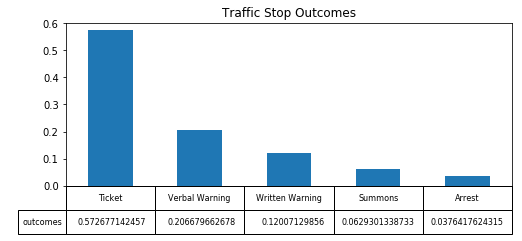

In [16]:
final_features_deduped = final_features['outcomes'].value_counts(normalize=True).plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
final_features_deduped.axes.get_xaxis().set_visible(False)
final_features_deduped.tables[0].scale(1, 2)

In [9]:
arrest = final_features.loc[final_features['outcomes'] == 'Arrest']
summons = final_features.loc[final_features['outcomes'] == 'Summons']
ww = final_features.loc[final_features['outcomes'] == 'Written Warning']
vw = final_features.loc[final_features['outcomes'] == 'Verbal Warning']

oversampled = final_features.append([arrest] * 10, ignore_index=True)
oversampled = oversampled.append([summons] * 6, ignore_index=True)
oversampled = oversampled.append([ww] * 4, ignore_index=True)
oversampled = oversampled.append([vw] * 2, ignore_index=True)
oversampled.shape

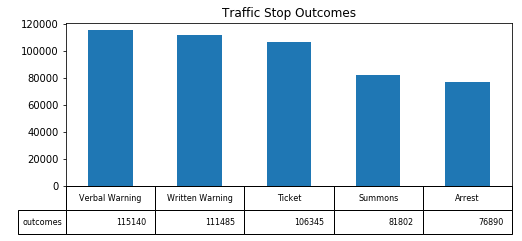

In [11]:
outcome_breakdown = oversampled['outcomes'].value_counts().plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
outcome_breakdown.axes.get_xaxis().set_visible(False)
outcome_breakdown.tables[0].scale(1, 2)

In [12]:
oversampled['outcomes'].value_counts(normalize=True)

Verbal Warning     0.234185
Written Warning    0.226751
Ticket             0.216297
Summons            0.166379
Arrest             0.156388
Name: outcomes, dtype: float64

In [11]:
oversampled_outcomes = oversampled.pop('outcomes')

In [12]:
oversampled_outcomes[:10]

0             Ticket
1     Verbal Warning
2             Ticket
3    Written Warning
4             Ticket
5     Verbal Warning
6             Ticket
7     Verbal Warning
8             Ticket
9     Verbal Warning
Name: outcomes, dtype: object

In [13]:
oversampled[:10]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oversampled, 
                                                    oversampled_outcomes, 
                                                    test_size=0.2, 
                                                    random_state=0)


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Simple Linear Classifier

In [63]:
from sklearn import linear_model

clf_sgd = linear_model.SGDClassifier()
clf_sgd.fit(X_train, y_train)
clf_sgd.score(X_test, y_test)

0.44559925093632957

# VotingClassifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier


clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=0)
clf5 = GradientBoostingClassifier(random_state=0)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)],
                         voting='hard',
                         n_jobs=5)
eclf1 = eclf1.fit(X_train, y_train)
print('eclf1 score: {}'.format(eclf1.score(X_test, y_test)))

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)],
                         voting='soft',
                         n_jobs=5)
eclf2 = eclf2.fit(X_train, y_train)
print('eclf2 score: {}'.format(eclf2.score(X_test, y_test)))

# eclf3 = VotingClassifier(estimators=[
#        ('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)],
#        voting='soft', weights=[1,1,1,1,1])
# eclf3 = eclf3.fit(X_train, y_train)
# print('eclf3 score: {}'.format(eclf3.score(X_test, y_test)))

eclf1 score: 0.5922114402451482
eclf2 score: 0.7582397003745318


# XGBoost

In [15]:
import xgboost as xgb

In [16]:
codes = {
    'Ticket': 1,
    'Arrest': 2,
    'Summons': 3,
    'Verbal Warning': 4,
    'Written Warning': 5,
}

def labels_to_ints(label):
    return codes[label]

In [17]:
# Lop off 10,000 training rows for final final testing
X_test_2 = X_train[:10000]
X_train = X_train[10000:]
y_test_2 = y_train[:10000]
y_train = y_train[10000:]

In [18]:
xg_train = xgb.DMatrix(X_train.values, label=y_train.apply(labels_to_ints).values)
xg_test = xgb.DMatrix(X_test.values, label=y_test.apply(labels_to_ints).values)
xg_test_2 = xgb.DMatrix(X_test_2.values, label=y_test_2.apply(labels_to_ints).values)

In [ ]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': .0983,
    'max_depth': 8,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.6,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 5
bst = xgb.train(params, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [ ]:
np.savetxt('oversampled_deduped/pred-{}.txt'.format(timestamp), pred)

In [ ]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

## My own grid search

In [19]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': 0.0983,
    'max_depth': 19,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.9,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [20]:
# max_depths = [19]
# num_classes = [43]
# subsamples = [0.9]
# learning_rates = [0.09825, 0.0983, 0.09835]

# Uncomment on first run
# best_params = {
#     'error_rate': 1,
#     'learning_rate': .03,
# }

# for learning_rate in learning_rates:
#     params['learning_rate'] = learning_rate
#     print('\nlearning_rate: {}'.format(learning_rate))
    # params['max_depth'] = depth
    # print('\nmax_depth: {}'.format(depth))
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 1000

bst = xgb.train(params, xg_train, num_round, watchlist)

[0]	train-merror:0.474427	test-merror:0.48524
[1]	train-merror:0.447937	test-merror:0.464862
[2]	train-merror:0.426281	test-merror:0.448485
[3]	train-merror:0.408659	test-merror:0.435802
[4]	train-merror:0.39406	test-merror:0.424208
[5]	train-merror:0.380986	test-merror:0.412802
[6]	train-merror:0.370432	test-merror:0.404656
[7]	train-merror:0.359441	test-merror:0.39628
[8]	train-merror:0.350663	test-merror:0.390083
[9]	train-merror:0.342016	test-merror:0.383197
[10]	train-merror:0.333162	test-merror:0.375877
[11]	train-merror:0.325659	test-merror:0.369825
[12]	train-merror:0.31911	test-merror:0.364087
[13]	train-merror:0.311843	test-merror:0.35761
[14]	train-merror:0.305886	test-merror:0.352673
[15]	train-merror:0.299393	test-merror:0.347353
[16]	train-merror:0.294184	test-merror:0.342637
[17]	train-merror:0.289217	test-merror:0.338594
[18]	train-merror:0.285162	test-merror:0.335504
[19]	train-merror:0.281692	test-merror:0.332448
[20]	train-merror:0.278302	test-merror:0.329716
[21]	tr

In [21]:
pred = bst.predict(xg_test)

In [22]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))
# if error_rate < best_params['error_rate']:
#     best_params['error_rate'] = error_rate
#     best_params['learning_rate'] = learning_rate

# print('Best params:  {}'.format(best_params))

Test error using softmax = 0.18387810691181478


In [23]:
pred_2 = bst.predict(xg_test_2)

In [24]:
error_rate = np.sum(pred_2 != y_test_2.apply(labels_to_ints)) / y_test_2.shape[0]
print('Test error using softmax [test_2] = {}'.format(error_rate))

Test error using softmax [test_2] = 0.1815


In [31]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [37]:
bst.save_model('./oversampled_deduped/{}-xgb_model-1K-saved.model'.format(timestamp))

In [38]:
bst.dump_model('./oversampled_deduped/{}-xgb_model-1K-dumped.txt'.format(timestamp))

In [34]:
xg_train.save_binary('./oversampled_deduped/{}-xg_train.buffer'.format(timestamp))

In [35]:
xg_test.save_binary('./oversampled_deduped/{}-xg_test.buffer'.format(timestamp))

In [36]:
xg_test_2.save_binary('./oversampled_deduped/{}-xg_test_2.buffer'.format(timestamp))

In [32]:
X_train.to_csv('./oversampled_deduped/{}-X_train.csv'.format(timestamp))

In [33]:
y_train.to_csv('./oversampled_deduped/{}-y_train.csv'.format(timestamp))

### Reload model and resume training

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
loaded = xgb.Booster({'nthread': 8})
loaded.load_model('oversampled_deduped/xgb_model-1K-saved-20180505093413.model')
num_round = 1000

loaded = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_loaded = bst.predict(xg_test)
error_rate = np.sum(pred_loaded != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

### xgboost.cv Test

In [ ]:
cvd = xgb.cv(params, xg_train, nfold=5)

In [ ]:
cvd

# RUN BELOW MANUALLY

## GridSearchCV

In [ ]:
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kwargs = {
    'tree_method': ['gpu_hist'],
}

xgb_model = xgb.XGBClassifier(kwargs)

parameters = {
    'objective': ['multi:softmax'],
    'learning_rate': [.05],
    'max_depth': [6, 7, 8],
#     'max_depth': [2],
    'silent': [0],
    'nthread': [7],
#     'n_estimators': [5],
    'n_estimators': [5],
#     'num_class': 43,
#     'predictor': ['gpu_predictor'],
#     'max_bin': 512,
#     'tree_method': ['gpu_hist'],
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': [0.6],
    'seed': [0],
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

# clf = GridSearchCV(xgb_model, parameters, n_jobs=1, 
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(random_state=0, n_splits=5, shuffle=True), 
#                    cv=xgb.cv(parameters, xg_train, nfold=5),
                   scoring='accuracy',
                   verbose=2, refit=True)

In [ ]:
# xgb_model.get_params().keys()

In [ ]:
clf.fit(X_train.values, y_train.apply(labels_to_ints).values)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw accuracy score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
bst.save_model('oversampled_deduped/xgb_model-saved-{}.model'.format(timestamp))
bst.dump_model('oversampled_deduped/xgb_model_dumped-{}.txt'.format(timestamp))

In [ ]:
from sklearn.externals import joblib

joblib.dump(bst, "oversampled_deduped/xgb_model_{}.joblib.dat".format(timestamp))


In [ ]:
bst.save_model('./oversampled_deduped/xgb_model_test_001-saved.model')

In [ ]:
bst.dump_model('./oversampled_deduped/xgb_model_test_001-dumped.txt')

In [ ]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [ ]:
print('f0:\t{}'.format(col_names[0]))
print('f3:\t{}'.format(col_names[3]))
print('f30:\t{}'.format(col_names[30]))


In [ ]:
xgb.plot_tree(bst, num_trees=2)

In [ ]:
xgb.to_graphviz(bst, num_trees=2)

In [ ]:
import pickle

In [ ]:
from datetime import datetime

pickle.dump(bst, open('./xgb_model_5k.pickle.{}.dat'.format(datetime.now().strftime('%Y%m%d%H%M%S')), 'wb'))

### Plot results

In [25]:
error_results = {
    'train': [],
    'test': [],
}

with open('oversampled_deduped/xgboost-1k_run-05052251.log', 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

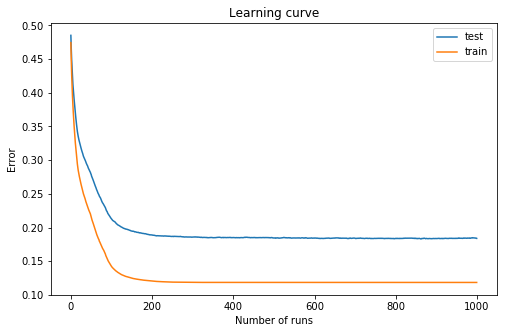

In [26]:
learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')


In [ ]:
type(error_results['test'])

In [27]:
df_accuracy = df_errors.copy()
df_accuracy_processed = df_accuracy.mul(-1).add(1)

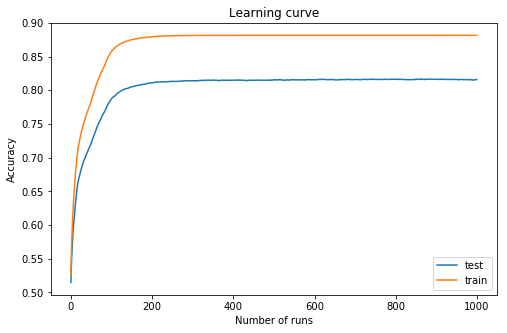

In [29]:
learning_curve = df_accuracy_processed.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Accuracy')


### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

labels = ['Ticket', 'Arrest', 'Summons', 'Verbal Warning', 'Written Warning']
cm = confusion_matrix(y_test_2.apply(labels_to_ints), pred_2)
pd.DataFrame(cm, columns=labels, index=labels)

,Ticket,Arrest,Summons,Verbal Warning,Written Warning
Ticket,982,63,108,433,262
Arrest,0,1287,21,0,6
Summons,0,49,1929,0,13
Verbal Warning,63,40,72,2067,392
Written Warning,4,48,66,175,1920


In [45]:
y_test_2.value_counts()

Verbal Warning     2634
Written Warning    2213
Summons            1991
Ticket             1848
Arrest             1314
Name: outcomes, dtype: int64

#### Precision, recall, and f- scores

In [44]:
from sklearn.metrics import precision_recall_fscore_support

scores = {
    'micro': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='micro'),
    'macro': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='macro'),
    'weighted': precision_recall_fscore_support(y_test_2.apply(labels_to_ints), pred_2, average='weighted'),
}

df_scores = pd.DataFrame(scores, index=['precision', 'recall', 'fscore', 'support']).iloc[:3,:]
df_scores

,macro,micro,weighted
precision,0.838642,0.8185,0.829011
recall,0.826407,0.8185,0.818500
fscore,0.819201,0.8185,0.811413


# Load saved model and resume training

In [ ]:
# watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 1000

# loaded = pickle.load(open('./xgb_model_5k.pickle.dat', 'rb'))
# bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
# pred_continued = bst_continued.predict(xg_test)

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 5000
num_round = 50

loaded = xgb.Booster({'nthread': 8})
loaded.load_model('saved.model')
# loaded.load_model('xgb_model-saved-20180430174133.model')
# loaded.load_model('./xgb_model-dumped-20180430174133.model')
# loaded.load_model('./xgb_model_test_001-saved.model')

In [ ]:
bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_continued = bst_continued.predict(xg_test)

In [ ]:
error_rate = np.sum(pred_continued != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
bst_continued.save_model('./oversampled_deduped/xgb_model-1K-saved-{}.model'.format(timestamp))
bst_continued.dump_model('./oversampled_deduped/xgb_model-1K-dumped-{}.txt'.format(timestamp))